In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/content/creditcard.csv')
data.shape

(13954, 31)

In [3]:
data.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13953.000000,13953.000000
mean,10121.161817,-0.235676,0.284287,0.846047,0.302775,-0.118730,0.128013,-0.157297,-0.016148,0.989827,-0.333609,0.865847,-1.560515,1.008561,0.843260,-0.190991,-0.040584,0.420274,0.001080,-0.086197,0.022740,-0.068037,-0.157471,-0.035585,0.011158,0.117019,0.035544,0.012787,0.002122,63.882442,0.004013
std,7739.625811,1.720315,1.394804,1.561376,1.500595,1.289494,1.320395,1.238583,1.262024,1.214044,1.233066,1.193020,1.538233,1.159372,1.339198,0.979098,0.970020,1.226870,0.846063,0.826925,0.584038,0.873942,0.621845,0.499807,0.587225,0.427953,0.558290,0.399550,0.255710,177.887021,0.063227
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,-14.166795,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.276034,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2984.250000,-0.969786,-0.282728,0.407297,-0.623141,-0.717155,-0.624025,-0.616307,-0.182270,0.288101,-0.786564,0.069939,-2.474334,0.202567,0.266895,-0.773039,-0.529582,-0.054278,-0.436966,-0.574853,-0.162353,-0.271778,-0.549723,-0.173807,-0.339656,-0.135887,-0.374596,-0.076862,-0.014869,5.490000,0.000000
50%,9086.500000,-0.319439,0.252904,0.960978,0.220104,-0.191627,-0.144198,-0.111960,0.016945,0.971414,-0.382171,0.799094,-1.866619,1.107065,1.123058,-0.050635,0.029426,0.415021,0.053610,-0.087252,-0.038037,-0.132304,-0.122777,-0.045041,0.060208,0.155162,-0.035825,-0.000950,0.016238,15.690000,0.000000
75%,17103.500000,1.162662,0.884741,1.607031,1.198942,0.351255,0.508494,0.421830,0.265736,1.654184,0.124503,1.664089,-0.425290,1.862585,1.562890,0.485050,0.532973,0.895445,0.496725,0.435214,0.138816,0.018677,0.228997,0.069750,0.392734,0.393032,0.375271,0.098516,0.072497,52.150000,0.000000
max,24759.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,12.259949,12.018913,3.774837,4.465413,7.692209,3.635042,4.816252,9.253526,4.295648,4.555359,8.012574,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [6]:
for col in data:
    data[col] = data[col].fillna(data[col].median())

In [9]:
data.isnull().sum()
data_features = data.columns

In [10]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

mms.fit(data)

data_scaled = pd.DataFrame(mms.transform(data))
data_scaled.columns = data_features

In [11]:
data_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000
mean,0.408787,0.925883,0.772522,0.886836,0.299084,0.483044,0.526283,0.433694,0.691182,0.464762,0.523454,0.236836,0.752351,0.559913,0.745454,0.508700,0.715032,0.682724,0.652455,0.510802,0.624690,0.334486,0.642604,0.580091,0.441751,0.475286,0.282975,0.492215,0.424064,0.008283,0.004013
std,0.312598,0.058058,0.030882,0.054272,0.090479,0.019481,0.029414,0.020354,0.036936,0.069105,0.046660,0.081634,0.071400,0.147598,0.049772,0.125726,0.056915,0.044067,0.068469,0.087154,0.027434,0.025641,0.047367,0.015086,0.102795,0.041522,0.114971,0.024617,0.030311,0.023064,0.063225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.120532,0.901108,0.759968,0.871585,0.243255,0.474004,0.509530,0.426151,0.686320,0.424818,0.506314,0.182374,0.709934,0.457303,0.724033,0.433960,0.686341,0.665679,0.617005,0.459300,0.615995,0.328508,0.612725,0.575919,0.380340,0.450748,0.198513,0.486692,0.422049,0.000712,0.000000
50%,0.366998,0.923056,0.771828,0.890831,0.294099,0.481943,0.520219,0.434439,0.692151,0.463713,0.521616,0.232268,0.738142,0.572453,0.755853,0.526723,0.719140,0.682535,0.656706,0.510691,0.621835,0.332601,0.645247,0.579806,0.450337,0.478986,0.268278,0.491369,0.425737,0.002034,0.000000
75%,0.690799,0.973074,0.785817,0.913287,0.353118,0.490145,0.534759,0.443211,0.699432,0.502578,0.540789,0.291456,0.805044,0.668637,0.772200,0.595511,0.748685,0.699791,0.692566,0.565756,0.630142,0.337030,0.672043,0.583271,0.508546,0.502065,0.352937,0.497497,0.432406,0.006759,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(data_scaled)

PCA()

In [13]:
print(pca.components_)

[[ 9.52998813e-01  2.77331258e-03  2.81283988e-04 -7.55526822e-03
   2.83033184e-02 -5.37107699e-03 -1.43286012e-03 -9.10694765e-03
   5.86885133e-03  8.59273959e-02 -2.53445652e-02  7.29670036e-02
  -1.18919853e-01  2.26112318e-01  4.71951699e-02 -8.90678877e-02
  -1.49064403e-03  2.66327185e-02  2.01017908e-02 -2.04618790e-02
  -2.77801160e-03 -2.99818272e-03 -2.13892443e-03 -4.52432025e-05
  -1.13517976e-02  1.19714655e-02 -1.22094110e-02 -6.14379722e-04
  -5.56252163e-05  3.29568718e-04  4.74366197e-03]
 [ 2.37915267e-01 -3.74355279e-03  2.72374402e-03 -2.14164882e-02
  -1.25435406e-01 -4.68486213e-03 -1.36617078e-02  2.40114859e-04
   5.61252665e-03  1.40103181e-05 -2.47700541e-02 -2.67440661e-02
   4.85151200e-02 -8.40954801e-01 -2.89014934e-02  3.12880239e-01
  -6.38630156e-02 -2.46196584e-02 -1.28618523e-02  8.13955014e-03
  -7.68267448e-03  5.64837688e-03  2.93682434e-02 -1.33727258e-03
   3.68354696e-03  4.68977478e-03 -3.33395355e-01  1.10637159e-02
  -2.37669100e-03 -9.5760

In [14]:
print(pca.components_.shape)

(31, 31)


In [15]:
print(pca.explained_variance_)

[1.06233189e-01 1.81426529e-02 1.59343340e-02 1.34858991e-02
 1.24938673e-02 1.04393926e-02 7.73643514e-03 6.92410452e-03
 4.75444514e-03 4.13092408e-03 3.86844912e-03 3.24414801e-03
 3.08162709e-03 2.53441819e-03 2.05749066e-03 1.81528496e-03
 1.55192265e-03 1.34381817e-03 1.09179637e-03 1.04517664e-03
 1.00532374e-03 9.42765765e-04 8.93388455e-04 7.28321124e-04
 6.13314143e-04 5.18354858e-04 4.36453542e-04 3.98904366e-04
 2.24727040e-04 2.12388062e-04 8.00439983e-06]


In [16]:
principal_components = pca.fit_transform(data_scaled)

principal_components_df = pd.DataFrame(principal_components)

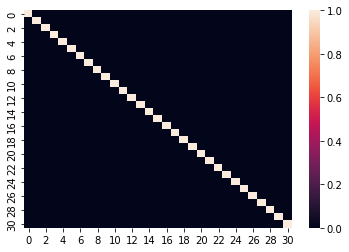

In [17]:
sns.heatmap(principal_components_df.corr())

Text(0, 0.5, 'cumulative explained variance')

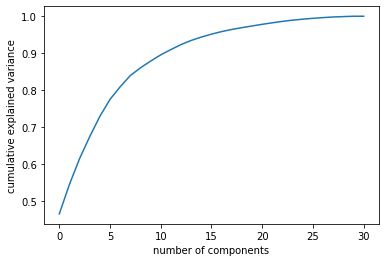

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [24]:
pca_low_dim = PCA(n_components=5)

In [25]:
pca_low_dim.fit(data_scaled)

PCA(n_components=5)

In [26]:
print(data.shape)
print(pca_low_dim.transform(data_scaled).shape)

(13954, 31)
(13954, 5)


In [27]:
print(pca_low_dim.explained_variance_)

[0.10623319 0.01814265 0.01593433 0.0134859  0.01249387]


In [28]:
print(pca_low_dim.explained_variance_.sum())

0.1662899397169609
